<a href="https://colab.research.google.com/github/antontmur/ld_sensitivity/blob/master/%D0%9F%D0%BE%D0%B8%D1%81%D0%BA_%D0%BF%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80%D0%BE%D0%B2_%D1%82%D0%B5%D1%87%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B6%D0%B8%D0%B4%D0%BA%D0%BE%D1%81%D1%82%D0%B8_%D0%B2_%D1%82%D1%80%D1%83%D0%B1%D0%BE%D0%BF%D1%80%D0%BE%D0%B2%D0%BE%D0%B4%D0%B5_%D0%BF%D1%80%D0%B8_%D0%B2%D0%BE%D0%B7%D0%BD%D0%B8%D0%BA%D0%BD%D0%BE%D0%B2%D0%B5%D0%BD%D0%B8%D0%B8_%D1%83%D1%82%D0%B5%D1%87%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Часть 1. Теория

###  Постановка задачи

Задача состоит в том, чтобы оценить влияние утечки на показатели течения (напор, объёмный расход) в участке трубопровода.

**Входные данные**
- координаты начала и конца трубопровода (*x_start, y_start*)
- давление, пересчитанное в единицы напора [м] (с учётом высотных отметок) в начале и конце трубопровода (*H_start, H_end*)
- единый эффективный диаметр трубопровода (*diameter*)
- кинематитческая вязкость нефти (*viscosity*)
- координата и объёмный расход утечки (*x_leak, q_leak*)

**Выходные данные**
- значения объёмного расхода до и после утечки (*q_before, q_after*)
- установившийся профиль напора вдоль трубопровода без утечки/с утечкой


## Решение

### Уравнение Дарси-Вейсбаха
![Замещающий текст](https://downloader.disk.yandex.ru/preview/41b2bfadf85ffea6e060b110621da8814c79e61ddf56e70a8b29ab8cec143a44/5f2ada9c/qJMk9TfqPxi054qImRgb4-beCnsXSyHLBErgVX5dULR3R3P9D7w3CLoeRx1HzGCXQiWDGnbLBOXqluCk2wY8ZA==?uid=0&filename=Profile.png&disposition=inline&hash=&limit=0&content_type=image%2Fpng&tknv=v2&owner_uid=14121831&size=1920x939)

Установившийся режим течения в трубопроводе описывается уравнением Дарси-Вейсбаха:
$$
H_{start}-H_{end} = \lambda \frac{u^2}{2gD}L,
$$
где $H_{start}, H_{end}$ - напор в начале и конце трубопровода, $D, L$ - диаметр и длина трубопровода, $u$ - линейная скорость течения вдоль трубопровода, $g$ - ускорение свободного падения, $\lambda$ - коэффициент трения, рассчитываемый по формуле Блазиуса:
$$
\lambda = \frac{0.3164}{\sqrt[4]{uD/\nu}}
$$
где $\nu$ - кинематическая вязкость.

Объединяя эти два уравнения и переходя от скорости к объёмному расходу $Q$ через формулу:
$$
Q = u\frac{\pi D^2}{4}
$$
получим:
$$
H_{start}-H_{end} = \beta \frac{Q^{7/4} \nu^{7/4}}{D^{19/4}}L,
$$ 
где $beta$ - постоянная величина, равная:
$$
\beta = \frac{0.3164 \cdot 4^{7/4}}{2g \pi^{7/4}}
$$

### Система уравнений
![Замещающий текст](https://downloader.disk.yandex.ru/preview/9f6c9c2c6b362d43abfad4ede02256bb191e2e9f1f3d827d211a9d9e7a08b0a7/5f2adbe4/6LFIo_vvGbZ9mOF5sOr9TGVksOAO3th48xOboU6An8DAiHnYHJOXzjYHrMW-NDV72CWIpiad9rZi2XmC5z4Gbw==?uid=0&filename=Profile+with+leak.png&disposition=inline&hash=&limit=0&content_type=image%2Fpng&tknv=v2&owner_uid=14121831&size=1920x939)

Трубопровод без утечки подчиняется уравнению Дарси-Вейсбаха в чистом виде.
Трубопровод с утечкой можно условно разбить на два участка:
- участок до утечки с расходом $q_{before}$ 
- участок после утечки с расходом $q_{after}$ 

Каждый из этих участков описывается нелинейным уравнением Дарси-Вейсбаха:
$$
f_1 = f_{Darcy}(x_{start}, x_{leak}, H_{start}, H_{leak}, q_{before}) = 0
$$
$$
f_2 = f_{Darcy}(x_{leak}, x_{end}, H_{leak}, H_{end}, q_{after}) = 0
$$
Третьим уравнением является уравнение, связывающее объёмные расходы для точки утечки:
$$
f_3 = q_{before}-q_{after}-q_{leak} = 0
$$

Итого имеем три уравнения (два из которых нелинейные) и три варьируемых параметра:
- расход до утечки $q_{before}$
- расход после утечки $q_{after}$
- напор в точке утечки $H_{leak}$

Решим эту систему нелинейных уравнений с помощтю функции fsolve библиотеки scipy.

# Часть 2. Код

In [ ]:
# импортируем необходимое
from math import pow, pi
from scipy.optimize import fsolve
from matplotlib import pyplot as plt

### Уравнение Дарси-Вейсбаха для участка трубопровода


In [ ]:
const_beta = 0.3164 * pow(4, 7 / 4) / (2 * 9.80665 * pow(pi, 7 / 4))

class Darcy_Weisbach:
    """Класс, рассчитывающий течение в участке трубы в установившемся режиме.
    Описывается уравнением Дарси-Вейсбаха."""

    def __init__(self, diameter, viscosity):
        self.diameter = diameter
        self.viscosity = viscosity

    def calc_consumption(self, x_start, x_end, H_start, H_end):
        # Расчёт объёмного расхода по заданным координатам начала/конца и напора в них
        delta_H = H_start - H_end
        delta_x = x_end - x_start
        q7 = pow(delta_H, 4) * pow(self.diameter, 19) / (pow(const_beta, 4) * self.viscosity * pow(delta_x, 4))
        return pow(q7, 1 / 7)

    def calc_deltah(self, x_start, x_end, q):
        # Расчёт перепада напора по заданному расходу и координатам начала/конца
        delta_x = x_end - x_start
        deltah = const_beta * pow(pow(q, 7) * self.viscosity / pow(self.diameter, 19), 0.25) * delta_x
        return deltah

In [ ]:
# Проверим
dw = Darcy_Weisbach(1.0, 1e-5)
q = dw.calc_consumption(0, 368000, 550.0, 50.0)
print("Трубопровод с диаметром 1.0 м и длиной 368 км; вязкость 10 сСт, перепад напора 500 м")
print("Получаемый расход: ", q*3600, " м3/ч")

Трубопровод с диаметром 1.0 м и длиной 368 км; вязкость 10 сСт, перепад напора 500 м
Получаемый расход:  3561.572122557628  м3/ч


### Построение уравнений для задачи оптимизации

In [ ]:
def equations(p, *args):
    dw, H_start, H_end, x_leak, q_leak, x_start, x_end = args

    # разворачиваем вектор переменных
    q_before, q_after, H_leak = p  

    # Уравнение 1. Раход до утечки равен qbefore
    eq1 = q_before - dw.calc_consumption(x_start, x_leak, H_start, H_leak)
    
    # Уравнение 2. Расход после утечки равен qafter
    eq2 = q_after - dw.calc_consumption(x_leak, x_end, H_leak, H_end)
    
    # Уравнение 3. Разность расходов до и после утечки равна расходу самой утечки
    eq3 = q_before - q_after - q_leak

    return (eq1, eq2, eq3)

In [ ]:
# вспомогательная функция линейной интерполяции
def interpolate(x_start, x_end, y_start, y_end, x_in):
    return y_start * (x_end-x_in) / (x_end-x_start) + y_end * (x_in - x_start) / (x_end-x_start)

In [ ]:
def find_leak_parameters(x_start, x_end, diameter, viscosity, H_start, H_end, x_leak, q_leak):

    if not (x_start <= x_leak <= x_end):
      print("Некорректная координата утечки.")
      return False, 0, 0, 0, 0, 0
    
    dw = Darcy_Weisbach(diameter, viscosity)

    # Рассчитаем объёмный расход жидкости в трубопроводе без утечки
    q_noleak = dw.calc_consumption(x_start, x_end, H_start, H_end)
    
    # Напор в точке утечки в момент, когда утечки ещё нет
    H_noleak = interpolate(x_start, x_end, H_start, H_end, x_leak)
        
    # Начальное приближение и параметры вектор-функции
    zero_appr = (q_noleak+q_leak/2, q_noleak-q_leak/2, H_noleak)
    fargs = (dw, H_start, H_end, x_leak, q_leak, x_start, x_end)

    # Решение системы нелинейных уравнений
    p, infodict, ier, mesg = fsolve(equations, zero_appr, args=fargs, full_output=True)
    q_before, q_after, H_leak = p

    if ier is not 1:
      print("Решение не найдено. Сообщение об ошибке: ", mesg)
      return False, 0, 0, 0, 0, 0

    return True, q_before, q_after, q_noleak, H_leak, H_noleak

# Часть 3. Тест

In [ ]:
# Параметры трубопровода и режима без утечки
x_start = 0.0
x_end = 368000.0
diameter = 1.0
viscosity = 1e-5
H_start = 550.0
H_end = 50.0
x_leak = 100000.0
q_leak = 0.05    # величина утечки 180 м3/ч

sucess_flag, q_before, q_after, q_noleak, H_leak, H_noleak = find_leak_parameters(x_start, x_end, diameter, viscosity, H_start, H_end, x_leak, q_leak)
if sucess_flag:
  print("Результаты:\n Расход до утечки: {0:0.2f} м3/ч\n Расход за утечкой: {1:0.2f} м3/ч".format(q_before*3600, q_after*3600))
  print(" Напор в точке без утечки: {0:0.2f} м\n Напор в точке с утечкой: {1:0.2f} м".format(H_noleak, H_leak))


Результаты:
 Расход до утечки: 3691.99 м3/ч
 Расход за утечкой: 3511.99 м3/ч
 Напор в точке без утечки: 414.13 м
 Напор в точке с утечкой: 405.30 м


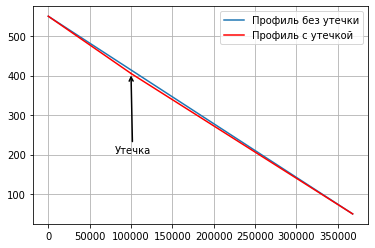

In [ ]:
plt.plot([x_start, x_end], [H_start, H_end], label='Профиль без утечки')
plt.plot([x_start, x_leak], [H_start, H_leak], 'r', label='Профиль с утечкой')
plt.plot([x_leak, x_end], [H_leak, H_end], 'r')
plt.annotate('Утечка',xy=(x_leak, H_leak), xytext=(x_leak-2e4,H_leak/2), arrowprops=dict(arrowstyle='->',lw=1.5))
plt.grid(True)
plt.legend()